In [452]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [453]:
raw_dataset = pd.read_csv('ce475_project_data.csv', delimiter=';')
dataset = raw_dataset.copy()
test_data = dataset.tail(20)
dataset = dataset.drop(test_data.index)

In [454]:
dataset.head()

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.0
1,27,14,6,85,11,27,-24.0
2,34,13,14,63,-16,34,4092.0
3,5,18,24,83,-4,5,121.0
4,31,44,10,57,-7,31,2441.0


In [455]:
test_data.head()

,x1,x2,x3,x4,x5,x6,Y
100,8,46,30,32,5,8,NaN
101,10,23,16,27,13,10,NaN
102,6,9,28,76,-20,6,NaN
103,11,31,3,46,-11,11,NaN
104,12,27,0,98,20,12,NaN


In [456]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    int64  
 1   x2      120 non-null    int64  
 2   x3      120 non-null    int64  
 3   x4      120 non-null    int64  
 4   x5      120 non-null    int64  
 5   x6      120 non-null    int64  
 6   Y       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


In [457]:
pd.DataFrame(raw_dataset.isna().sum()).T

,x1,x2,x3,x4,x5,x6,Y
0,0,0,0,0,0,0,20


In [458]:
dataset.describe().T[['min', 'max', 'mean']]

,min,max,mean
x1,0.0,40.0,19.29
x2,0.0,50.0,22.53
x3,0.0,35.0,16.68
x4,0.0,100.0,50.60
x5,-20.0,20.0,-1.44
x6,0.0,40.0,19.29
Y,-42.0,12402.0,1746.82


In [459]:
predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [460]:
dataset.corr()

,x1,x2,x3,x4,x5,x6,Y
x1,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
x2,-0.167880,1.000000,-0.047579,-0.072409,-0.191095,-0.167880,0.071139
x3,-0.051437,-0.047579,1.000000,0.106278,0.070286,-0.051437,0.280280
x4,-0.153805,-0.072409,0.106278,1.000000,-0.137413,-0.153805,0.122084
x5,0.091953,-0.191095,0.070286,-0.137413,1.000000,0.091953,-0.508310
x6,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
Y,0.300764,0.071139,0.280280,0.122084,-0.508310,0.300764,1.000000


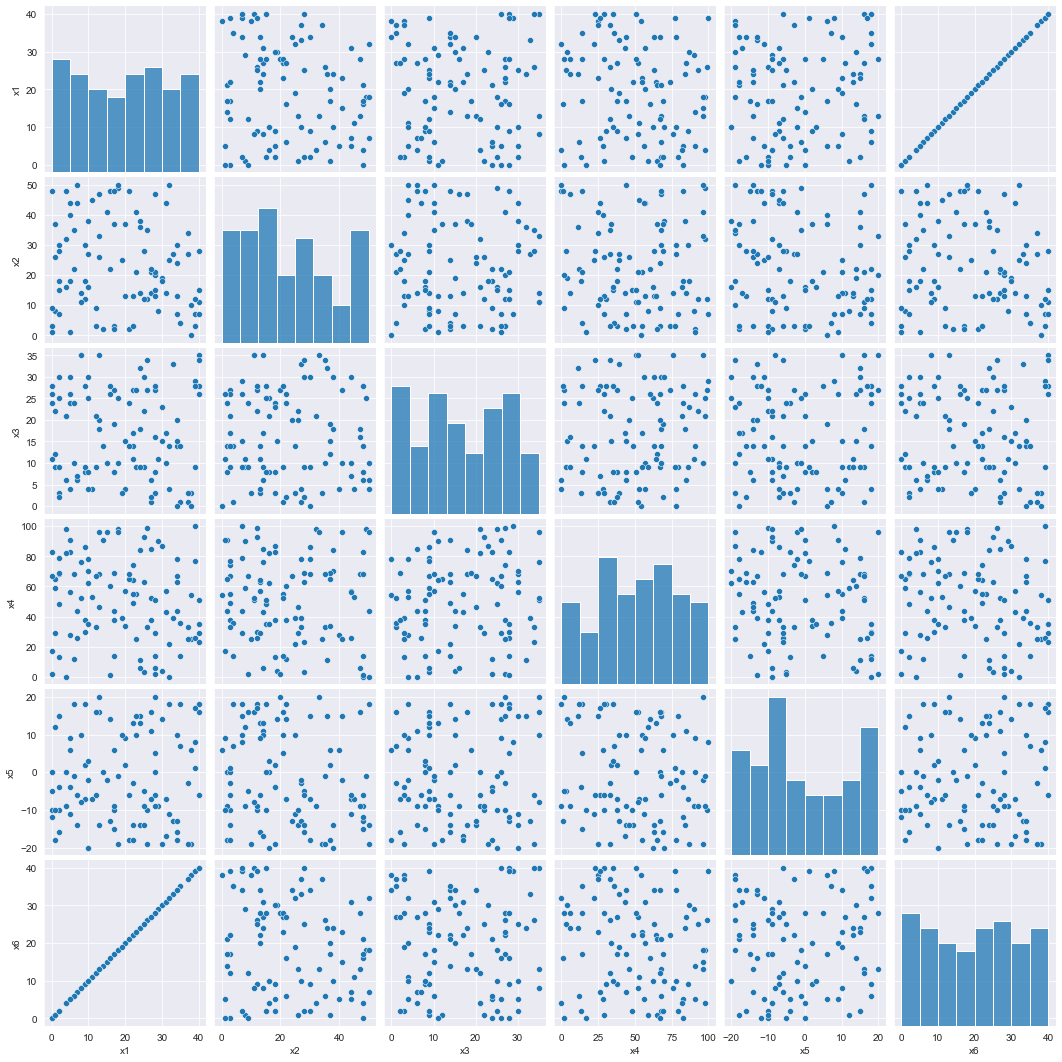

In [461]:
sns.pairplot(dataset[predictors])

In [462]:
dataset.drop(columns=['x6'], inplace=True, axis=1)
test_data.drop(columns=['x6'], inplace=True, axis=1)
predictors.remove('x6')
predictors

['x1', 'x2', 'x3', 'x4', 'x5']

In [463]:
dataset.describe().transpose()[['min', 'max', 'mean']]

,min,max,mean
x1,0.0,40.0,19.29
x2,0.0,50.0,22.53
x3,0.0,35.0,16.68
x4,0.0,100.0,50.60
x5,-20.0,20.0,-1.44
Y,-42.0,12402.0,1746.82


### Linear Regression

In [464]:
def linear_regression(x, y):
    cv_score = cross_val_score(estimator=LinearRegression(), X=x, y=y, cv=5, scoring='neg_root_mean_squared_error')
    cv_pred = cross_val_predict(estimator=LinearRegression(), X=x, y=y, cv=5)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(test_data[predictors])
    pred_score = lr.score(x, y)

    return y_pred, cv_pred, cv_score, pred_score

In [465]:
lin_pred, cv_predictions, rmse_score, score = linear_regression(x=dataset[predictors], y=dataset['Y'])

In [466]:
score

0.501304804757538

<AxesSubplot:xlabel='x5', ylabel='Y'>

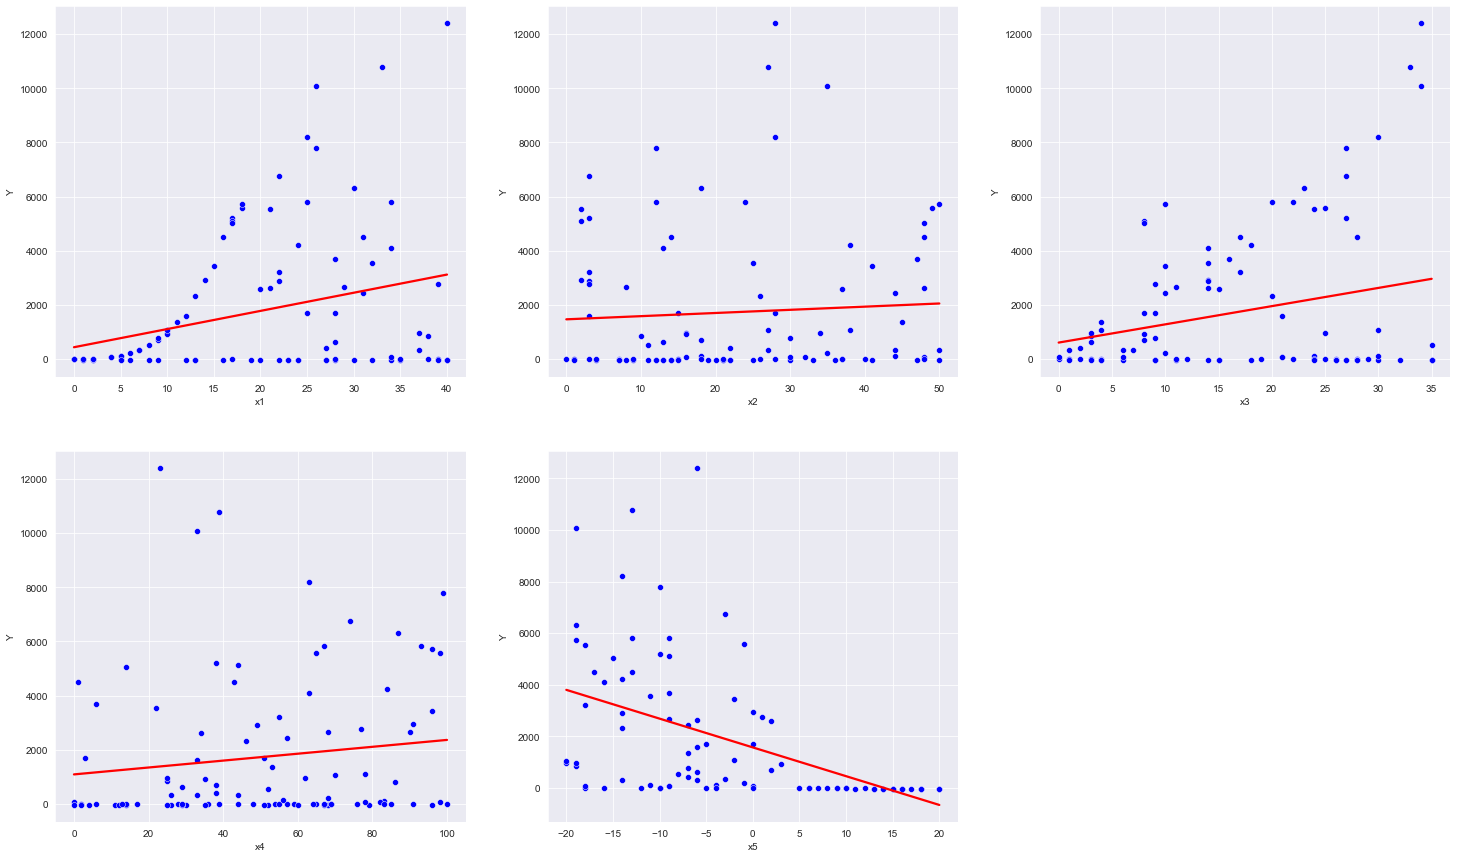

In [467]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(x=dataset['x1'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x1'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 2)
sns.scatterplot(x=dataset['x2'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x2'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 3)
sns.scatterplot(x=dataset['x3'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x3'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 4)
sns.scatterplot(x=dataset['x4'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x4'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 5)
sns.scatterplot(x=dataset['x5'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x5'], y=cv_predictions, color='r', scatter=False, ci=False)

In [468]:
errors = pd.DataFrame([rmse_score], columns=['x1', 'x2', 'x3', 'x4', 'x5'], index=['negative-rmse']).sort_values(
    'negative-rmse', axis=1)
errors

,x5,x3,x1,x2,x4
negative-rmse,-2429.893973,-2278.8514,-1965.113992,-1955.278777,-1389.341241


### Multiple Linear Regression

In [469]:
def get_combinations(pred, n=2):
    comb = []
    for k in range(n, len(pred) + 1):
        comb.extend(list(combinations(pred, k)))
    return list(map(list, comb))

In [470]:
def multiple_linear_regression(x, y, pred=None):
    cv_score = cross_val_score(estimator=LinearRegression(), X=x[pred], y=y, cv=5,
                               scoring='neg_root_mean_squared_error')
    cv_pred = cross_val_predict(estimator=LinearRegression(), X=x[pred], y=y, cv=5)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(test_data[predictors])
    pred_score = lr.score(x, y)

    return y_pred, cv_pred, cv_score, pred_score

In [471]:
score

0.501304804757538

In [472]:
errors = pd.DataFrame([rmse_score], columns=predictors, index=['negative-rmse']).sort_values('negative-rmse', axis=1)
errors['mean'] = np.mean(rmse_score)
errors

,x5,x3,x1,x2,x4,mean
negative-rmse,-2429.893973,-2278.8514,-1965.113992,-1955.278777,-1389.341241,-2003.695876


#### K-Nearest Neighbors Regression (KNN)

In [575]:
def k_nearest_neighbors(x, y, k, pred=None):
    cv_score = cross_val_score(estimator=KNeighborsRegressor(n_neighbors=k), X=x[pred], y=y, cv=5,
                               scoring='neg_root_mean_squared_error')
    cv_pred = cross_val_predict(estimator=KNeighborsRegressor(n_neighbors=k), X=x[pred], y=y, cv=5)
    knn = KNeighborsRegressor()
    knn.fit(x, y)
    y_pred = knn.predict(test_data[predictors])
    pred_score = knn.score(x, y)

    return y_pred, cv_pred, cv_score, pred_score

In [576]:
knn_pred, cv_predictions, rmse_score, score = k_nearest_neighbors(x=dataset[predictors], y=dataset['Y'], k=1,
                                                                  pred=['x5', 'x3', 'x1'])

In [623]:
predictor_combinations = get_combinations(pred=predictors)
errors = pd.DataFrame()
rmse_scores = []

for i in range(1, 6):
    knn_pred, cv_predictions, rmse_score, score = k_nearest_neighbors(x=dataset[predictors], y=dataset['Y'], k=i,
                                                                      pred=['x5', 'x3', 'x1'])
    errors[f'k={i}'] = rmse_score
    rmse_scores.append(rmse_score)

for i in range(1, 6):
    errors.loc['mean', f'k={i}'] = np.mean(rmse_scores[i - 1])

In [648]:
errors = pd.DataFrame()

for i in predictor_combinations:
    # print(f'inputs: {i}')
    for j in range(1, 6):
        # print(f'fold {j}')
        knn_pred, cv_predictions, rmse_score, score = k_nearest_neighbors(x=dataset[predictors], y=dataset['Y'], k=j, pred=i)
        # print(f'rmse: {np.mean(rmse_score)}')
        errors.loc[f'k={j}', f'{i}'] = np.mean(rmse_score)
        # errors.loc['mean'] = np.mean(rmse_scores[j - 1])

errors.sort_values(['k=1', 'k=2', 'k=3', 'k=4', 'k=5'], axis=1, ascending=False)

inputs: ['x1', 'x2']
fold 1
rmse: -2781.512036783114
fold 2
rmse: -2706.8739548011717
fold 3
rmse: -2493.7534912614856
fold 4
rmse: -2485.0929164537465
fold 5
rmse: -2391.560840139199
inputs: ['x1', 'x3']
fold 1
rmse: -3112.3071307459168
fold 2
rmse: -2447.7523043368506
fold 3
rmse: -2361.905983001452
fold 4
rmse: -2185.809255922414
fold 5
rmse: -2209.9314837854245
inputs: ['x1', 'x4']
fold 1
rmse: -3142.880372158289
fold 2
rmse: -2829.098638943896
fold 3
rmse: -2681.4745494365357
fold 4
rmse: -2658.785059482849
fold 5
rmse: -2644.5958853800553
inputs: ['x1', 'x5']
fold 1
rmse: -2078.6494290615296
fold 2
rmse: -1803.1834379571803
fold 3
rmse: -1616.5224245904228
fold 4
rmse: -1599.4720597655987
fold 5
rmse: -1631.7864778387175
inputs: ['x2', 'x3']
fold 1
rmse: -3354.251375518659
fold 2
rmse: -3113.8339525632473
fold 3
rmse: -2872.0813373806927
fold 4
rmse: -2835.6083903282083
fold 5
rmse: -2730.8999853399255
inputs: ['x2', 'x4']
fold 1
rmse: -3706.1172386657154
fold 2
rmse: -3023.01191

,"['x1', 'x3', 'x5']","['x1', 'x2', 'x3', 'x5']","['x1', 'x2', 'x3', 'x4', 'x5']","['x1', 'x3', 'x4', 'x5']","['x1', 'x5']","['x1', 'x4', 'x5']","['x1', 'x2', 'x5']","['x1', 'x2', 'x3']","['x1', 'x2', 'x3', 'x4']","['x3', 'x4', 'x5']",...,"['x2', 'x4', 'x5']","['x1', 'x3']","['x1', 'x4']","['x4', 'x5']","['x2', 'x3']","['x3', 'x4']","['x2', 'x5']","['x2', 'x3', 'x4']","['x1', 'x2', 'x4']","['x2', 'x4']"
k=1,-998.614011,-1502.612137,-1851.190792,-1912.336640,-2078.649429,-2257.332464,-2258.639434,-2284.383224,-2695.336470,-2728.791018,...,-3080.959161,-3112.307131,-3142.880372,-3233.242412,-3354.251376,-3404.177818,-3473.989385,-3527.915476,-3559.341814,-3706.117239
k=2,-1095.949318,-1366.891639,-1779.410189,-1874.374497,-1803.183438,-2130.955516,-2038.876348,-1949.364104,-2205.907209,-2682.600063,...,-2840.000271,-2447.752304,-2829.098639,-2804.288832,-3113.833953,-2995.635624,-2862.723591,-2973.446153,-2814.364748,-3023.011915
k=3,-1097.203971,-1407.935587,-1732.129623,-1554.570040,-1616.522425,-2299.432869,-1949.109410,-2351.633144,-2195.512527,-2490.239027,...,-2828.004618,-2361.905983,-2681.474549,-2652.547255,-2872.081337,-2876.299833,-2744.763411,-2708.759265,-2674.020728,-3123.081620
k=4,-1177.520259,-1459.852014,-1812.862359,-1652.516710,-1599.472060,-2296.985084,-1949.573692,-2309.871240,-2201.154375,-2457.256560,...,-2731.623977,-2185.809256,-2658.785059,-2496.591503,-2835.608390,-2812.232242,-2548.136386,-2721.368970,-2725.997343,-3046.700820
k=5,-1202.734601,-1439.102296,-1876.852361,-1679.521972,-1631.786478,-2338.805261,-1947.942047,-2345.822653,-2330.037642,-2282.563212,...,-2781.249942,-2209.931484,-2644.595885,-2428.797337,-2730.899985,-2812.530886,-2485.928827,-2668.917204,-2672.097249,-3025.852833


In [635]:
errors.sort_values('mean', axis=1, ascending=False).rename_axis('k', axis=1)
errors.index.name = 'predictors'
errors

,k=1,k=2,k=3,k=4,k=5
predictors,,,,,
0,-749.710144,-755.319891,-765.395232,-877.871111,-835.287222
1,-379.808833,-761.757614,-819.250837,-944.376939,-894.250918
2,-1071.137153,-1028.868456,-1345.873285,-1447.781603,-1501.399427
3,-1858.159910,-1231.178836,-1106.044019,-949.577817,-806.684521
4,-933.898228,-1710.266302,-1601.836474,-1667.993823,-1992.344018
mean,-998.542854,-1097.478220,-1127.679969,-1177.520259,-1205.993221


In [605]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to mean
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k=1     6 non-null      float64
 1   k=2     6 non-null      float64
 2   k=3     6 non-null      float64
 3   k=4     6 non-null      float64
 4   k=5     6 non-null      float64
dtypes: float64(5)
memory usage: 460.0+ bytes
